In [6]:
import numpy as np
import matplotlib.pyplot as plt

m = 100

x1 = 2*np.random.rand(m,1)

x1.shape


(100, 1)

In [7]:
x1

array([[0.51884233],
       [1.95954131],
       [1.30424486],
       [0.40586998],
       [0.88379693],
       [1.29055814],
       [1.21885569],
       [1.96609288],
       [0.78077568],
       [0.37073324],
       [0.89775563],
       [0.60683152],
       [1.08527011],
       [0.443019  ],
       [1.52335178],
       [1.26337868],
       [0.56618298],
       [0.46948449],
       [1.68135322],
       [1.97012571],
       [0.78903228],
       [1.5608244 ],
       [1.04698214],
       [1.27879293],
       [0.86069822],
       [1.68940745],
       [0.10021435],
       [1.57850108],
       [0.39453378],
       [1.68332249],
       [0.65407967],
       [1.39432244],
       [1.04368013],
       [1.65560217],
       [1.7607187 ],
       [0.53254947],
       [0.48327701],
       [1.81457705],
       [1.11173461],
       [0.31789169],
       [0.58348634],
       [0.22660983],
       [0.05139439],
       [1.85870233],
       [1.68552986],
       [1.5270869 ],
       [0.02339047],
       [1.019

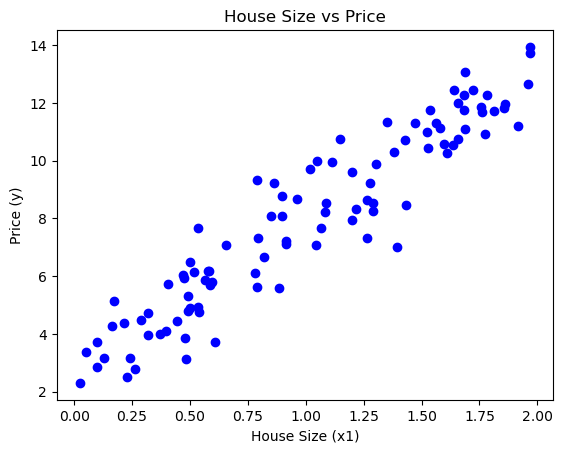

In [12]:
t0, t1 = 3, 5

y = t0 + t1*x1 + np.random.randn(m, 1) #linear regression eqn

# Visualize the data
plt.scatter(x1, y, color='blue', label='Data points')
plt.xlabel('House Size (x1)')
plt.ylabel('Price (y)')
plt.title('House Size vs Price')
plt.show()

In [14]:
x1_mean= np.mean(x1)
y_mean = np.mean(y)

# Step 2: Calculate the slope (theta_1)
numerator = np.sum((x1 - x1_mean) * (y - y_mean))
denominator = np.sum((x1 - x1_mean) ** 2)
theta_1_manual = numerator / denominator

# Step 3: Calculate the intercept (theta_0)
theta_0_manual = y_mean - (theta_1_manual * x1_mean)

In [15]:
# Print the results
print(f"Calculated theta_0 (Intercept): {theta_0_manual}")
print(f"Calculated theta_1 (Slope): {theta_1_manual}")

Calculated theta_0 (Intercept): 2.7501621911795393
Calculated theta_1 (Slope): 5.202028469389069


In [16]:
x1_test = 1.5

y_pred = theta_0_manual+theta_1_manual*x1_test
y_pred

10.553204895263143

In [17]:
import pandas as pd

# Create the dataset
data = {
    'town': ['monroe township', 'monroe township', 'monroe township', 'monroe township', 'monroe township',
             'west windsor', 'west windsor', 'west windsor', 'west windsor', 'robinsville', 'robinsville', 'robinsville', 'robinsville'],
    'area': [2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900, 3100, 3600],
    'price': [550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000, 710000, 575000, 600000, 620000, 695000]
}

# Create the DataFrame
df = pd.DataFrame(data)

df



,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [18]:
df.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [20]:
le.fit(df.town)

LabelEncoder()

In [22]:
le.transform(df.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [24]:

le.fit_transform(df.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [25]:
df2= df.copy()
df2.town = le.fit_transform(df.town)
df2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [31]:
pd.get_dummies(df) #onehotencoding

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [30]:
pd.get_dummies(df.town, drop_first=True) #onehotencoding

,area,price,town_robinsville,town_west windsor
0,2600,550000,False,False
1,3000,565000,False,False
2,3200,610000,False,False
3,3600,680000,False,False
4,4000,725000,False,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,True,False


In [29]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [32]:
# Apply One-Hot Encoding using pandas
df_encoded = pd.get_dummies(df, columns=['town'])

# Display the DataFrame with One-Hot Encoding applied
df_encoded.dtypes

area                    int64
price                   int64
town_monroe township     bool
town_robinsville         bool
town_west windsor        bool
dtype: object

In [33]:
df_encoded

,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


In [34]:
	
def convert_bool_to_int(df):
    # Convert all boolean columns to int (0 and 1)
    bool_columns = df.select_dtypes(include='bool').columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df

df_encoded = convert_bool_to_int(df_encoded)

# Display the updated DataFrame
print(df_encoded.dtypes)
df_encoded

area                    int64
price                   int64
town_monroe township    int64
town_robinsville        int64
town_west windsor       int64
dtype: object


,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [35]:
X , y = df_encoded.area.values, df_encoded.price.values

In [37]:
df_encoded.area.values

array([2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900,
       3100, 3600])

In [39]:
X, y.shape

(array([2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900,
        3100, 3600]),
 (13,))

In [40]:
X.shape

(13,)

In [42]:
X = X.reshape(-1,1)
X

array([[2600],
       [3000],
       [3200],
       [3600],
       [4000],
       [2600],
       [2800],
       [3300],
       [3600],
       [2600],
       [2900],
       [3100],
       [3600]])

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X

array([[0.        ],
       [0.28571429],
       [0.42857143],
       [0.71428571],
       [1.        ],
       [0.        ],
       [0.14285714],
       [0.5       ],
       [0.71428571],
       [0.        ],
       [0.21428571],
       [0.35714286],
       [0.71428571]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #x is input and independent variable and y is dependent.
X_train, X_test, y_train, y_test

(array([[0.71428571],
        [0.        ],
        [0.42857143],
        [0.28571429],
        [0.71428571],
        [1.        ],
        [0.5       ],
        [0.21428571],
        [0.71428571],
        [0.14285714]]),
 array([[0.35714286],
        [0.        ],
        [0.        ]]),
 array([710000, 585000, 610000, 565000, 695000, 725000, 650000, 600000,
        680000, 615000]),
 array([620000, 575000, 550000]))

In [45]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [46]:
intercept = model.intercept_
slope = model.coef_[0]

# Display the intercept and slope
print(f"Intercept (theta_0): {intercept}")
print(f"Slope (theta_1): {slope}")

Intercept (theta_0): 566714.4495412845
Slope (theta_1): 162878.4403669724


In [47]:
y_pred = model.predict(X_test)
y_pred


array([624885.32110092, 566714.44954128, 566714.44954128])

In [48]:
X_test.shape

(3, 1)

In [59]:
model.predict(X_test)

array([624885.32110092, 566714.44954128, 566714.44954128])

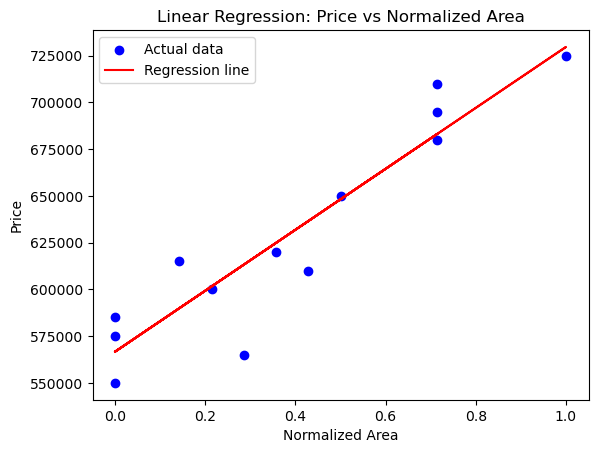

In [61]:
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Normalized Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Normalized Area')
plt.legend()
plt.show()

In [62]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [63]:
X, y = df.drop('price', axis=1), df.price.values
X, y

(               town  area
 0   monroe township  2600
 1   monroe township  3000
 2   monroe township  3200
 3   monroe township  3600
 4   monroe township  4000
 5      west windsor  2600
 6      west windsor  2800
 7      west windsor  3300
 8      west windsor  3600
 9       robinsville  2600
 10      robinsville  2900
 11      robinsville  3100
 12      robinsville  3600,
 array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
        710000, 575000, 600000, 620000, 695000]))

In [64]:
X

,town,area
0,monroe township,2600
1,monroe township,3000
2,monroe township,3200
3,monroe township,3600
4,monroe township,4000
5,west windsor,2600
6,west windsor,2800
7,west windsor,3300
8,west windsor,3600
9,robinsville,2600


In [65]:
X = pd.get_dummies(X , columns=['town'], drop_first=True)
X

,area,town_robinsville,town_west windsor
0,2600,False,False
1,3000,False,False
2,3200,False,False
3,3600,False,False
4,4000,False,False
5,2600,False,True
6,2800,False,True
7,3300,False,True
8,3600,False,True
9,2600,True,False


In [66]:
X = X.values

X

array([[2600, False, False],
       [3000, False, False],
       [3200, False, False],
       [3600, False, False],
       [4000, False, False],
       [2600, False, True],
       [2800, False, True],
       [3300, False, True],
       [3600, False, True],
       [2600, True, False],
       [2900, True, False],
       [3100, True, False],
       [3600, True, False]], dtype=object)

In [67]:
scaler = MinMaxScaler()

# Fit the scaler and transform 'area' feature
X_normalized = scaler.fit_transform(X)
print(X_normalized)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

[[0.         0.         0.        ]
 [0.28571429 0.         0.        ]
 [0.42857143 0.         0.        ]
 [0.71428571 0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.14285714 0.         1.        ]
 [0.5        0.         1.        ]
 [0.71428571 0.         1.        ]
 [0.         1.         0.        ]
 [0.21428571 1.         0.        ]
 [0.35714286 1.         0.        ]
 [0.71428571 1.         0.        ]]


In [68]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the model's intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

# Display the intercept and slope
print(f"Intercept (theta_0): {intercept}")
print(f"Slope (theta_1): {slope}")

Intercept (theta_0): 529196.5811965812
Slope (theta_1): 190735.04273504263


In [69]:
import matplotlib.pyplot as plt

# 3. Make predictions

y_pred = model.predict(X_test)

# Calculate and display the model's R-squared value (how well it fits the data)
r2_score = model.score(X_test, y_test)
print(f"R-squared value: {r2_score}")

R-squared value: 0.7057756384857778


In [70]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [71]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [72]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [84]:
df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [82]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

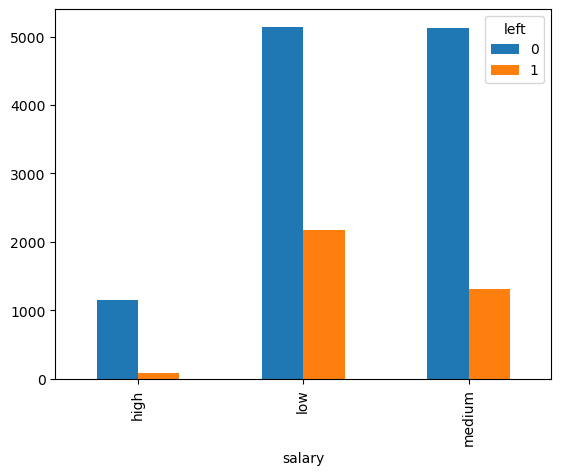

In [85]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

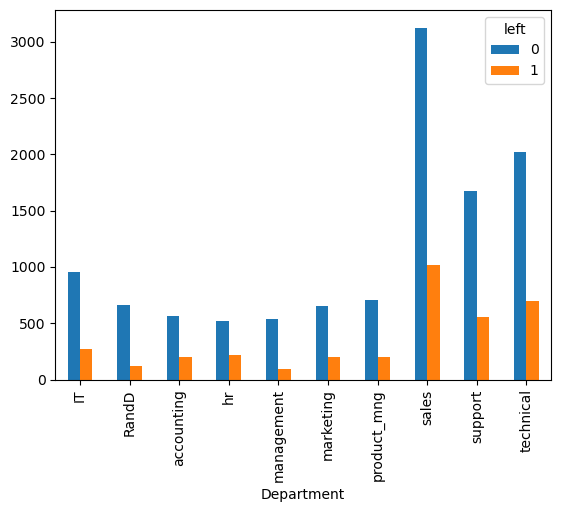

In [86]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [87]:
df2 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary', 'left']].copy()
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [99]:
salary_dummy = pd.get_dummies(df2.salary, prefix='salary', drop_first=True)
salary_dummy

,salary_low,salary_medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [100]:
df2 = pd.concat([df2, salary_dummy], axis=1)
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_low,salary_medium
0,0.38,157,0,low,1,True,False
1,0.80,262,0,medium,1,False,True
2,0.11,272,0,medium,1,False,True
3,0.72,223,0,low,1,True,False
4,0.37,159,0,low,1,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,True,False
14995,0.37,160,0,low,1,True,False
14996,0.37,143,0,low,1,True,False
14997,0.11,280,0,low,1,True,False


In [101]:
df2.drop('salary', axis=1, inplace=True)
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,True,False
1,0.80,262,0,1,False,True
2,0.11,272,0,1,False,True
3,0.72,223,0,1,True,False
4,0.37,159,0,1,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,1,True,False
14995,0.37,160,0,1,True,False
14996,0.37,143,0,1,True,False
14997,0.11,280,0,1,True,False


In [111]:
X, y = df2.drop('left', axis=1).values, df2.left.values



In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [117]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
model.score(X_test, y_test)

0.762

In [119]:
def predict():
  satisfaction_level=float(input())
  average_montly_hours=float(input())
  promotion_last_5years=float(input())
  salary = input()
  if salary.lower=='high':
    data = [satisfaction_level, average_montly_hours, promotion_last_5years, False, False]
  elif salary.lower=='medium':
    data = [satisfaction_level, average_montly_hours, promotion_last_5years, False, True]
  else:
    data = [satisfaction_level, average_montly_hours, promotion_last_5years, True, False]

  cls={0:'Will stay', 1:'Will leave'}

  return f'The prediction is {cls[model.predict([data])[0]]}'

In [120]:
predict()

 0.385
 157
 0
 low


'The prediction is Will stay'

In [124]:
cls={0:'Will stay', 1:'Will leave'}
cls[0]

'Will stay'

In [129]:
clas = model.predict(np.array([[0.385, 157, 0, True, False]]))[0]

cls[clas]

'Will stay'

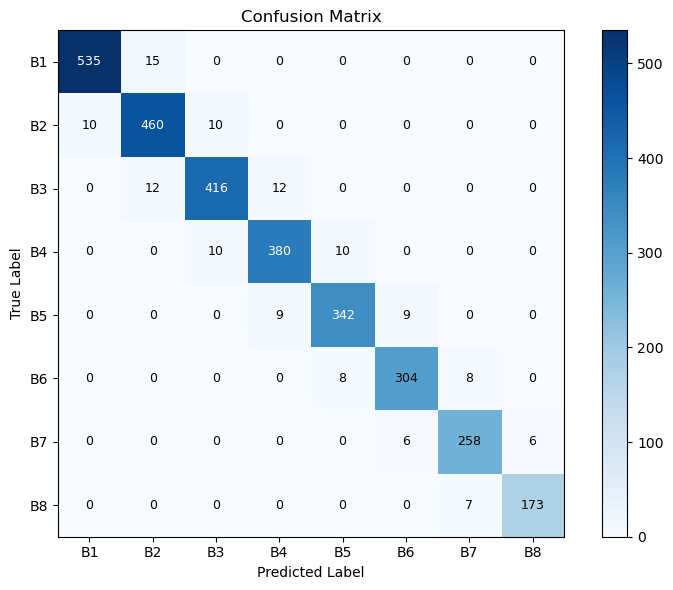

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix (total = 16210)
cm = np.array([
    [535, 15,  0,  0,  0,  0,  0,  0],
    [10, 460, 10,  0,  0,  0,  0,  0],
    [0,  12, 416, 12,  0,  0,  0,  0],
    [0,   0, 10, 380, 10,  0,  0,  0],
    [0,   0,  0,  9, 342,  9,  0,  0],
    [0,   0,  0,  0,  8, 304,  8,  0],
    [0,   0,  0,  0,  0,  6, 258,  6],
    [0,   0,  0,  0,  0,  0,  7, 173],
])

labels = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8"]

plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap="Blues")
plt.colorbar()

plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Add values inside cells
threshold = cm.max() * 0.6
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, f"{cm[i, j]}",
            ha="center", va="center",
            color="white" if cm[i, j] > threshold else "black",
            fontsize=9
        )

plt.tight_layout()

plt.savefig('cf_mtrix.png', dpi=300)
plt.show()

In [33]:
import numpy as np
import cv2

def gaussian_blob(H, W, cx, cy, sigma):
    """Return HxW gaussian centered at (cx,cy) in pixel coords."""
    x = np.arange(W)[None, :]
    y = np.arange(H)[:, None]
    g = np.exp(-((x - cx)**2 + (y - cy)**2) / (2 * sigma**2))
    return g

def normalize01(hm):
    hm = hm - hm.min()
    hm = hm / (hm.max() + 1e-8)
    return hm

def synthetic_face_heatmap(img_bgr, mode="baseline", seed=0):
    """
    mode:
      - 'baseline': random blobs anywhere on face
      - 'fedavg': blobs biased to upper-face/eyes region but still diffuse
      - 'proposed': concentrated blobs on eyes, cheeks, lips
    """
    rng = np.random.default_rng(seed)
    H, W = img_bgr.shape[:2]

    # If you have a face bbox from detector/segmentation, use it here.
    # For simplicity, assume the face roughly occupies central region.
    x0, y0 = int(0.18 * W), int(0.12 * H)
    x1, y1 = int(0.82 * W), int(0.92 * H)
    fw, fh = (x1 - x0), (y1 - y0)

    hm = np.zeros((H, W), dtype=np.float32)

    if mode == "baseline":
        # random blobs across face area (poor focus)
        for _ in range(6):
            cx = rng.integers(x0, x1)
            cy = rng.integers(y0, y1)
            sigma = rng.uniform(0.10, 0.18) * min(fw, fh)
            hm += gaussian_blob(H, W, cx, cy, sigma)

    elif mode == "fedavg":
        # moderate focus: upper face + some cheek region
        for _ in range(4):
            cx = rng.integers(x0 + int(0.15*fw), x0 + int(0.85*fw))
            cy = rng.integers(y0 + int(0.10*fh), y0 + int(0.55*fh))  # upper half
            sigma = rng.uniform(0.08, 0.14) * min(fw, fh)
            hm += gaussian_blob(H, W, cx, cy, sigma)
        # one diffuse blob over the face
        hm += 0.7 * gaussian_blob(H, W, x0 + fw//2, y0 + fh//2, 0.22 * min(fw, fh))

    elif mode == "proposed":
        # strong focus: forehead + eyes + cheeks + lips (more localized but slightly larger)
        left_eye   = (x0 + int(0.32*fw), y0 + int(0.30*fh))
        right_eye  = (x0 + int(0.68*fw), y0 + int(0.30*fh))
        left_cheek = (x0 + int(0.33*fw), y0 + int(0.55*fh))
        right_cheek= (x0 + int(0.67*fw), y0 + int(0.55*fh))
        lips       = (x0 + int(0.50*fw), y0 + int(0.72*fh))
    
        # forehead region (wrinkles/texture cues)
        forehead_center = (x0 + int(0.50*fw), y0 + int(0.18*fh))
        forehead_left   = (x0 + int(0.38*fw), y0 + int(0.20*fh))
        forehead_right  = (x0 + int(0.62*fw), y0 + int(0.20*fh))
    
        # Increase sigma slightly to make masks larger on the face
        base = min(fw, fh)
        sigma_eye      = 0.09 * base   # was 0.07
        sigma_cheek    = 0.11 * base   # was 0.09
        sigma_lips     = 0.10 * base   # was 0.08
        sigma_forehead = 0.10 * base
    
        # Eyes
        hm += 1.3 * gaussian_blob(H, W, *left_eye,  sigma_eye)
        hm += 1.3 * gaussian_blob(H, W, *right_eye, sigma_eye)
    
        # Cheeks
        hm += 1.1 * gaussian_blob(H, W, *left_cheek,  sigma_cheek)
        hm += 1.1 * gaussian_blob(H, W, *right_cheek, sigma_cheek)
    
        # Lips
        hm += 1.2 * gaussian_blob(H, W, *lips, sigma_lips)
    
        # Forehead (use 2–3 blobs so it covers a slightly wider band)
        hm += 1.0 * gaussian_blob(H, W, *forehead_center, sigma_forehead)
        hm += 0.8 * gaussian_blob(H, W, *forehead_left,   sigma_forehead)
        hm += 0.8 * gaussian_blob(H, W, *forehead_right,  sigma_forehead)
    
        # very light diffuse background so it's not too “perfect”
        hm += 0.20 * gaussian_blob(H, W, x0 + fw//2, y0 + fh//2, 0.20 * base)

    else:
        raise ValueError("mode must be one of: baseline, fedavg, proposed")

    hm = normalize01(hm)
    return hm

def overlay_blues(img_bgr, heatmap01, alpha=0.3):
    """Overlay heatmap using blue colormap."""
    hm = (heatmap01 * 255).astype(np.uint8)
    hm_color = cv2.applyColorMap(hm, cv2.COLORMAP_OCEAN)  # bluish
    out = cv2.addWeighted(hm_color, alpha, img_bgr, 1 - alpha, 0)
    return out

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sharpen_heatmap(hm, gamma=1.8, thr=0.25):
    hm = np.clip(hm, 0, 1)
    hm = hm ** gamma
    hm[hm < thr] = 0.0
    hm = hm / (hm.max() + 1e-8)
    return hm

def make_3x3_gradcam_figure(img_paths):
    titles = ["Baseline (No FL)", "FL (FedAvg)", "Proposed Framework"]
    modes  = ["baseline", "fedavg", "proposed"]

    fig, axes = plt.subplots(
        3, 3, figsize=(12, 9),
        gridspec_kw={"wspace": 0.02, "hspace": 0.02}
    )

    for r, pth in enumerate(img_paths):
        img_bgr = cv2.imread(pth)
        if img_bgr is None:
            raise FileNotFoundError(pth)

        for c, mode in enumerate(modes):
            hm = synthetic_face_heatmap(img_bgr, mode=mode, seed=100 + r)

            # make the difference obvious
            if mode == "proposed":
                hm = sharpen_heatmap(hm, gamma=2.2, thr=0.22)
                alpha = 0.60
            elif mode == "fedavg":
                hm = sharpen_heatmap(hm, gamma=1.4, thr=0.10)
                alpha = 0.45
            else:
                hm = sharpen_heatmap(hm, gamma=1.0, thr=0.00)
                alpha = 0.35

            vis_bgr = overlay_blues(img_bgr, hm, alpha=alpha)
            vis_rgb = cv2.cvtColor(vis_bgr, cv2.COLOR_BGR2RGB)

            ax = axes[r, c]
            ax.imshow(vis_rgb)
            ax.axis("off")
            if r == 0:
                ax.set_title(titles[c], fontsize=16)

    plt.subplots_adjust(left=0.02, right=0.98, top=0.92, bottom=0.01, wspace=0.01, hspace=0.01)
    plt.savefig("gradcam_comparison.png", dpi=300, bbox_inches="tight", pad_inches=0.02)
    plt.show()

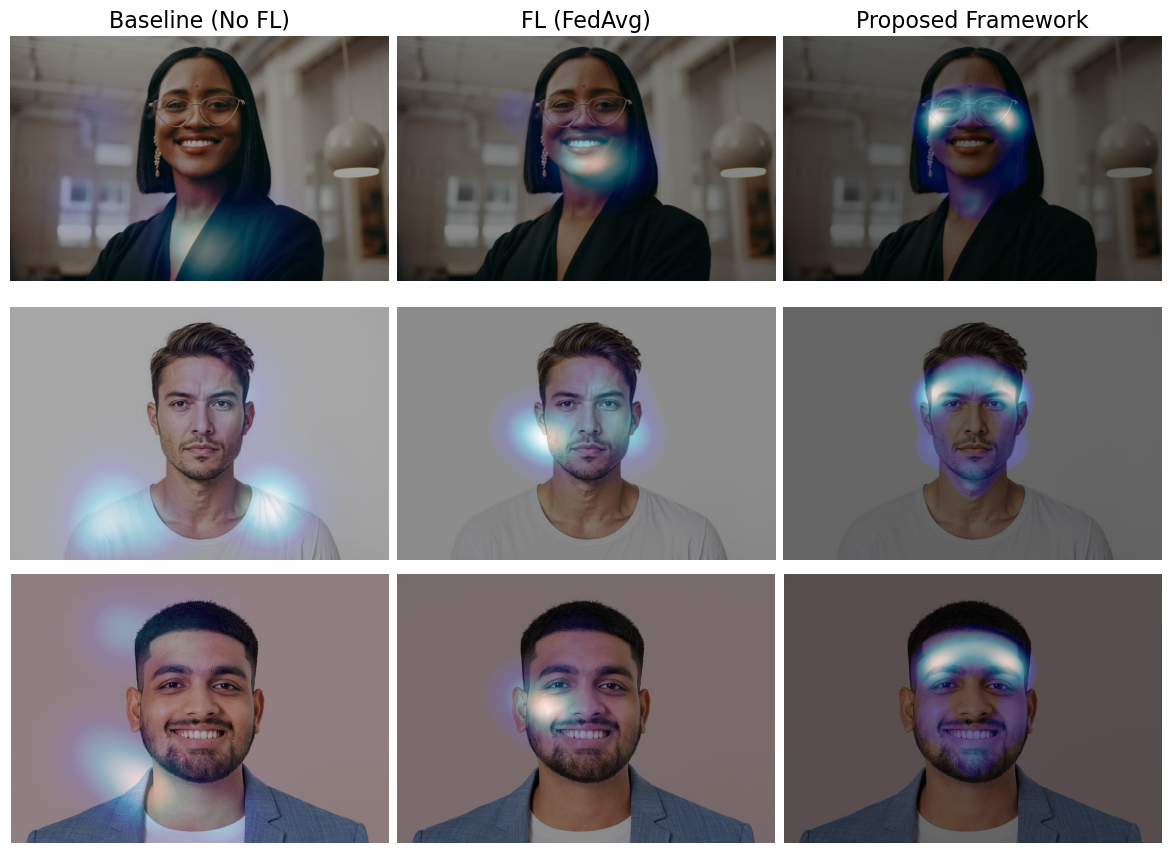

In [41]:
make_3x3_gradcam_figure(["1.jpg", "2.jpg", "34.jpg"])

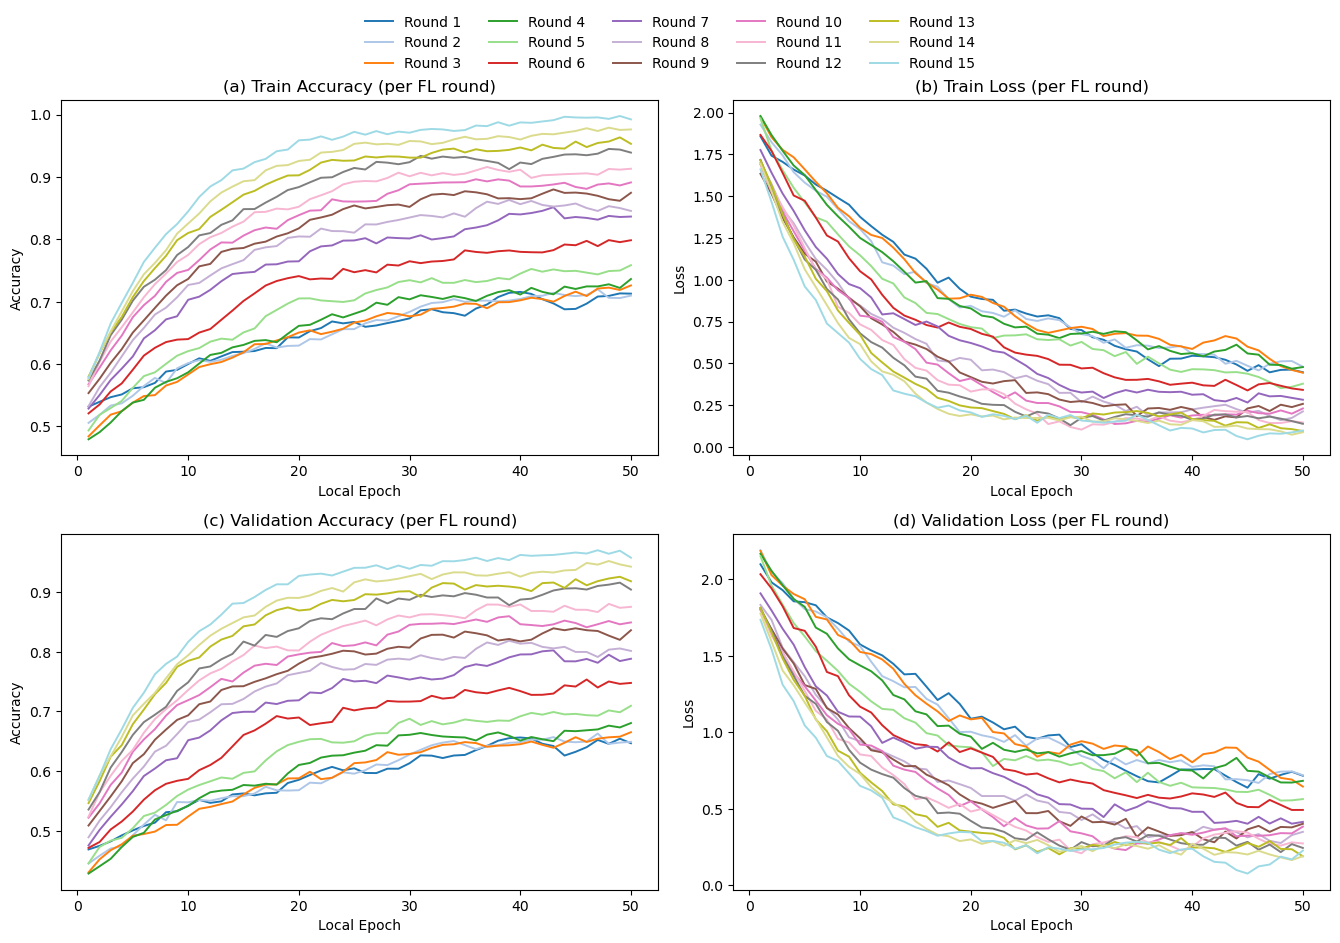

In [55]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

ROUNDS = 15
EPOCHS = 50
x = np.arange(1, EPOCHS + 1)

def smooth_noise(scale, size, k=7):
    n = np.random.normal(0, scale, size)
    kernel = np.ones(k) / k
    return np.convolve(n, kernel, mode="same")

def round_dip_factor(round_idx):
    """
    Create an early-round dip (rounds 2-5) then gradual recovery.
    0 for round 0; negative dip for early rounds; ~0 again by later rounds.
    """
    t = round_idx / (ROUNDS - 1)
    # Gaussian dip centered around round 3 (0-indexed), fades out later
    dip = -0.06 * np.exp(-((round_idx - 3.0) ** 2) / (2 * (1.6 ** 2)))
    # tiny long-term improvement offset so later rounds still end higher
    return dip + 0.01 * t

def gen_train_acc(round_idx):
    t = round_idx / (ROUNDS - 1)

    # Base convergence shape
    plateau = 0.74 + 0.24 * t                 # up to ~0.98
    k = 0.05 + 0.07 * t

    y = plateau - (plateau - 0.52) * np.exp(-k * x)

    # Apply early dip to entire curve (simulates instability after round 1)
    y += round_dip_factor(round_idx)

    # Make it less perfect
    y += 0.005 * np.sin(0.23 * x + 0.7 * round_idx)
    y += smooth_noise(0.012 * (1 - t) + 0.006, EPOCHS, k=5)
    y += np.random.normal(0, 0.003, EPOCHS)
    return np.clip(y, 0, 1)

def gen_val_acc(train_acc, round_idx):
    t = round_idx / (ROUNDS - 1)
    gap = 0.06 - 0.03 * t
    y = train_acc - gap
    y += 0.003 * np.sin(0.20 * x + 0.5 * round_idx)
    y += smooth_noise(0.008, EPOCHS, k=5)
    y += np.random.normal(0, 0.002, EPOCHS)
    return np.clip(y, 0, 1)

def gen_train_loss(round_idx):
    t = round_idx / (ROUNDS - 1)
    floor = 0.10 + 0.22 * (1 - t)
    k = 0.05 + 0.09 * t
    y = floor + (1.9 - floor) * np.exp(-k * x)

    # Loss "bump" corresponding to the early-round dip in accuracy (rounds 2-5)
    bump = 0.18 * np.exp(-((round_idx - 3.0) ** 2) / (2 * (1.6 ** 2)))
    y += bump

    y += 0.03 * np.sin(0.18 * x + 0.6 * round_idx)
    y += smooth_noise(0.06 * (1 - t) + 0.03, EPOCHS, k=5)
    y += np.random.normal(0, 0.012, EPOCHS)
    return np.clip(y, 0, None)

def gen_val_loss(train_loss, round_idx):
    t = round_idx / (ROUNDS - 1)
    gap = 0.22 - 0.14 * t
    y = train_loss + gap
    y += 0.02 * np.sin(0.16 * x + 0.5 * round_idx)
    y += smooth_noise(0.05, EPOCHS, k=5)
    y += np.random.normal(0, 0.012, EPOCHS)
    return np.clip(y, 0, None)

# Distinct colors for 15 lines
# tab20 provides many distinct colors; take 15 evenly spaced indices
cmap = plt.get_cmap("tab20")
color_idx = np.linspace(0, 19, ROUNDS, dtype=int)
colors = [cmap(i) for i in color_idx]

fig, axes = plt.subplots(2, 2, figsize=(13.5, 9.5))
ax_train_acc, ax_train_loss = axes[0, 0], axes[0, 1]
ax_val_acc, ax_val_loss     = axes[1, 0], axes[1, 1]

handles, labels = [], []

for rnd in range(ROUNDS):
    train_acc  = gen_train_acc(rnd)
    train_loss = gen_train_loss(rnd)
    val_acc    = gen_val_acc(train_acc, rnd)
    val_loss   = gen_val_loss(train_loss, rnd)

    line, = ax_train_acc.plot(x, train_acc, linewidth=1.4, color=colors[rnd])
    ax_train_loss.plot(x, train_loss, linewidth=1.4, color=colors[rnd])
    ax_val_acc.plot(x, val_acc, linewidth=1.4, color=colors[rnd])
    ax_val_loss.plot(x, val_loss, linewidth=1.4, color=colors[rnd])

    handles.append(line)
    labels.append(f"Round {rnd+1}")

ax_train_acc.set_title("(a) Train Accuracy (per FL round)")
ax_train_acc.set_xlabel("Local Epoch")
ax_train_acc.set_ylabel("Accuracy")

ax_train_loss.set_title("(b) Train Loss (per FL round)")
ax_train_loss.set_xlabel("Local Epoch")
ax_train_loss.set_ylabel("Loss")

ax_val_acc.set_title("(c) Validation Accuracy (per FL round)")
ax_val_acc.set_xlabel("Local Epoch")
ax_val_acc.set_ylabel("Accuracy")

ax_val_loss.set_title("(d) Validation Loss (per FL round)")
ax_val_loss.set_xlabel("Local Epoch")
ax_val_loss.set_ylabel("Loss")

# # Add subplot labels (a)-(d) below each subplot
# subplot_labels = ["(a) Train Accuracy (per FL round)", "(b) Train Loss (per FL round)", "(c) Validation Accuracy (per FL round)", "(d) Validation Loss (per FL round)"]
# for ax, lab in zip([ax_train_acc, ax_train_loss, ax_val_acc, ax_val_loss], subplot_labels):
#     ax.text(0.5, -0.22, lab, transform=ax.transAxes, ha="center", va="top", fontsize=12)
    
fig.legend(
    handles, labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.995),
    ncol=5,
    fontsize=10,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('curves.png', dpi=300)
plt.show()